<a href="https://colab.research.google.com/github/Byeonjinha/Colab/blob/main/Ch02.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/9_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2021/10/20
이름 : 변진하
내용 : 결정트리 실습하기
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics
import pydotplus
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 불러오기
df_iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/iris.csv')
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# 학습데이터
iris_train_data = df_iris.iloc[:, 0:4]
iris_train_label = df_iris.iloc[:, 4]
iris_train_label

train_data, test_data, train_label, test_label = train_test_split(iris_train_data, iris_train_label)
train_data

,sepal.length,sepal.width,petal.length,petal.width
16,5.4,3.9,1.3,0.4
93,5.0,2.3,3.3,1.0
71,6.1,2.8,4.0,1.3
25,5.0,3.0,1.6,0.2
28,5.2,3.4,1.4,0.2
...,...,...,...,...
87,6.3,2.3,4.4,1.3
97,6.2,2.9,4.3,1.3
142,5.8,2.7,5.1,1.9
54,6.5,2.8,4.6,1.5


In [ ]:
# 학습하기 
model = tree.DecisionTreeClassifier()
model.fit(train_data, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 테스트하기
result = model.predict(test_data)

In [ ]:
# 성능평가
score = metrics.accuracy_score(result, test_label)
score

0.9210526315789473

In [ ]:
# 모델 설명 확인
model_text = tree.export_text(model)
print(model_text)

|--- feature_2 <= 4.75
|   |--- feature_3 <= 0.80
|   |   |--- class: Setosa
|   |--- feature_3 >  0.80
|   |   |--- class: Versicolor
|--- feature_2 >  4.75
|   |--- feature_3 <= 1.70
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.60
|   |   |   |   |   |--- class: Versicolor
|   |   |   |   |--- feature_0 >  6.60
|   |   |   |   |   |--- class: Virginica
|   |--- feature_3 >  1.70
|   |   |--- class: Virginica



[Text(297.6, 597.96, 'petal.length <= 4.75\ngini = 0.66\nsamples = 112\nvalue = [34, 33, 45]\nclass = Virginica'),
 Text(148.8, 489.24, 'petal.width <= 0.8\ngini = 0.498\nsamples = 64\nvalue = [34, 30, 0]\nclass = Setosa'),
 Text(74.4, 380.52000000000004, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(223.20000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Vircicolor'),
 Text(446.40000000000003, 489.24, 'petal.width <= 1.7\ngini = 0.117\nsamples = 48\nvalue = [0, 3, 45]\nclass = Virginica'),
 Text(372.0, 380.52000000000004, 'petal.length <= 4.95\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = Virginica'),
 Text(297.6, 271.8, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Vircicolor'),
 Text(446.40000000000003, 271.8, 'petal.width <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = Virginica'),
 Text(372.0, 163.07999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Virginica'),
 Text(520.8

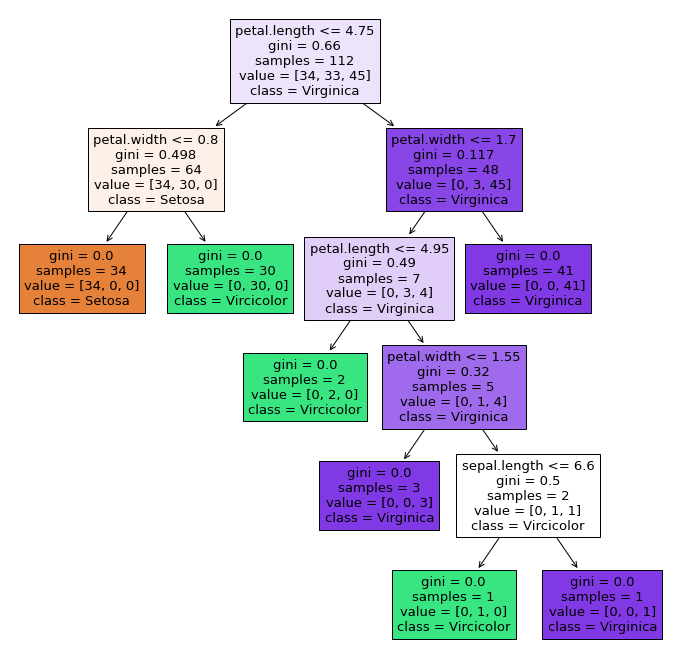

In [33]:
# 모델 시각화
fig = plt.figure(figsize=(12, 12))
tree.plot_tree(model, feature_names=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], 
               class_names=['Setosa','Vircicolor','Virginica'],
               filled=True)